In [7]:

import os, glob, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
quant_df = pd.read_csv(os.path.join('..','competition_data','bill_of_materials.csv'))

In [7]:
data_files = glob.glob(os.path.join('..','competition_data','*.csv'))
for file_name in data_files:
    print os.path.split(file_name)[-1]

bill_of_materials.csv
comp_adaptor.csv
comp_boss.csv
comp_elbow.csv
comp_float.csv
comp_hfl.csv
comp_nut.csv
comp_other.csv
comp_sleeve.csv
comp_straight.csv
comp_tee.csv
comp_threaded.csv
components.csv
specs.csv
test_set.csv
train_set.csv
tube.csv
tube_end_form.csv
type_component.csv
type_connection.csv
type_end_form.csv


In [8]:
quant_df = pd.read_csv(os.path.join('..','competition_data','bill_of_materials.csv'))

In [5]:
quant_df[0:20]

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2,C-1629,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1,C-1631,1,C-1641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TA-00006,C-1624,1,C-1631,1,C-1641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TA-00007,C-1622,2,C-1629,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TA-00008,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TA-00009,C-1625,2,C-1632,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TA-00010,C-1768,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
id2 = quant_df['component_id_2']

Number of quantity_1 : 19149.0
Number of quantity_2 : 14786.0
Number of quantity_3 : 4798.0
Number of quantity_4 : 608.0
Number of quantity_5 : 92.0
Number of quantity_6 : 26.0
Number of quantity_7 : 7.0
Number of quantity_8 : 1.0


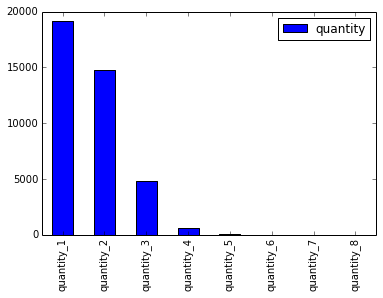

In [15]:
sumdata = []
dataname = []
for x in range(2,len(quant_df.columns),2):
    column = quant_df.columns[x]
    copy = quant_df[column].copy().replace('NaN',0)
    copy
    copy[copy != 0] = 1
    print "Number of", column, ":", sum(copy)
    sumdata.append(sum(copy))
    dataname.append(column)
from IPython.display import display
f = plt.figure()    
pd.DataFrame({'quantity':sumdata}, index = dataname).plot(kind='bar')
display(f)

This is the component histogram, most tubes have less than 2 components 

In [20]:
tube= quant_df['tube_assembly_id']
len(tube)

21198

In [22]:
test_set = pd.read_csv(os.path.join('..','competition_data','test_set.csv'))
train_set = pd.read_csv(os.path.join('..','competition_data','train_set.csv'))

In [23]:
datetime = train_set['quote_date'].unique()

In [24]:
datetime = pd.to_datetime(datetime, coerce=True)

(array([   1.,    0.,    0.,    0.,    0.,    1.,    2.,    2.,    0.,
           2.,    2.,    4.,    9.,   14.,   13.,   22.,   16.,   34.,
          41.,   54.,   60.,   55.,   69.,   73.,   92.,  106.,  118.,
          99.,  100.,  183.,  215.,  239.,  151.,    2.,    2.]),
 array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017]),
 <a list of 35 Patch objects>)

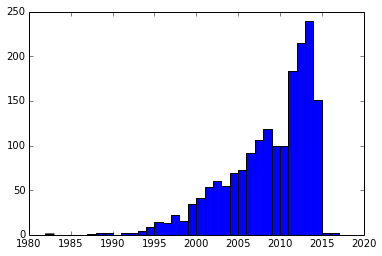

In [29]:
f = plt.figure() 
plt.hist(datetime.year,bins=range(min(datetime.year), max(datetime.year) + 1))

This is the histogram for quote year

In [30]:
tube_df = pd.read_csv(os.path.join('..','competition_data','tube.csv'))

In [31]:
tube_df[0:10]

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
5,TA-00006,SP-0029,19.05,1.24,79,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
6,TA-00007,SP-0035,12.70,1.65,202,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
7,TA-00008,SP-0039,6.35,0.71,174,6,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,TA-00009,SP-0029,25.40,1.65,135,4,63.50,N,N,N,N,EF-003,EF-003,0,0,0
9,TA-00010,SP-0046,42.70,4.80,290,4,110.00,N,N,N,N,EF-021,EF-021,0,0,0


(array([  1.02000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   9.26000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.64400000e+03,
          1.14880000e+04,   2.40000000e+01,   1.00000000e+00,
          9.00000000e+00,   1.55000000e+02,   1.30000000e+01,
          3.67600000e+03,   1.20000000e+01,   6.32000000e+02,
          2.07000000e+02,   9.70000000e+02,   0.00000000e+00,
          7.60000000e+01,   0.00000000e+00,   0.00000000e+00,
          2.40000000e+01,   1.00000000e+00,   8.92000000e+02,
          6.70000000e+01]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        42, 43

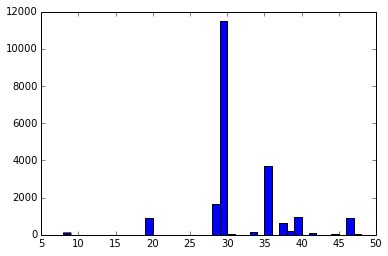

In [115]:
materialids = tube_df['material_id']
mids = list(materialids)
#mids = list(mid.split('-')[-1] for mid in mids)
#print mids
pruned_mids = []
for mid in mids:
    if not isinstance(mid,float):
        pruned_mids.append(mid)
mids = list(int(mid.split('-')[-1]) for mid in pruned_mids)
plt.hist(mids,bins=range(min(mids), max(mids) + 1))

This is the histogram for supplier, the biggest supplier is SP-0029

7061


(array([  33.,  294.,  338.,  298.,  258.,  245.,  224.,  190.,  183.,
         165.,  157.,  126.,  115.,  101.,   78.,   70.,   81.,   86.,
          54.,   45.,  234.,  869.,  354.,   77.,  117.,  114.,   90.,
         237.,  303.,  183.,  160.,  166.,  102.,   52.,   33.,   27.,
          71.,   59.,   50.,   14.,   19.,   13.,   18.,    8.,   12.,
           6.,    7.,   13.,    4.,    4.,   22.,    4.,   13.,   12.,
           9.,    7.,    9.,    8.,    6.,    6.,    6.,    9.,   10.,
           7.,    8.,    7.,    8.,    8.,    7.,    6.,   11.,    1.,
           5.,    7.,    5.,    5.,    5.,    1.,    3.,    1.,    4.,
           0.,    2.,    2.,    5.,    0.,    1.,    3.,    1.,    2.,
           2.,    1.,    3.,    5.,    3.,    4.,    3.,    2.,    5.,
           4.,    1.,    1.,    3.,    1.,    3.,    1.,    6.,    3.,
           4.,    5.,    2.,    3.,    3.,    0.,    1.,    1.,    4.,
           0.,    3.,    3.,    9.,    1.,    3.,    3.,    2.,    1.,
      

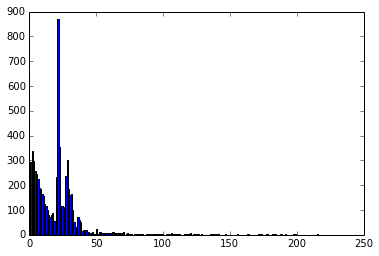

In [113]:
costsingle=[]
quantity = train_set['quantity']
cost = train_set['cost']
for i, j in enumerate(quantity):
    if j == 1:
        costsingle.append(cost[i])
print len(costsingle)
plt.hist(costsingle, bins=range(0, 200 + 20))

This is the histogram for cost of each tube, most tube is below $50 for one quantity 

TypeError: cannot concatenate 'str' and 'float' objects

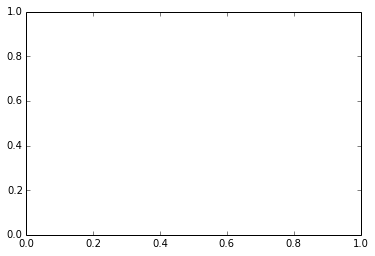